In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,f1_score,precision_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Hotel Reservations.csv")

####
#### The dataset of "HOTEL RESERVATION" includes 'Booking Status' as the target column, and we aim to analyze how 
#### other features influence it.

####

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.shape

(36275, 19)

####
#### We can see that there are 36275 instances and 19 variables in the data set.

####

In [5]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

####
#### We can see that there are no missing values in the dataset.

####

In [6]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

####
#### We can observe that there are no null values in the dataset.

####

In [7]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
df.duplicated().sum()

0

####
#### We can observe that there are no duplicate values in the dataset.

####

In [9]:
df.drop("Booking_ID",axis=1,inplace=True)

####
#### Booking_ID is removed,because it doesn't give any helpful information.

####

In [10]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

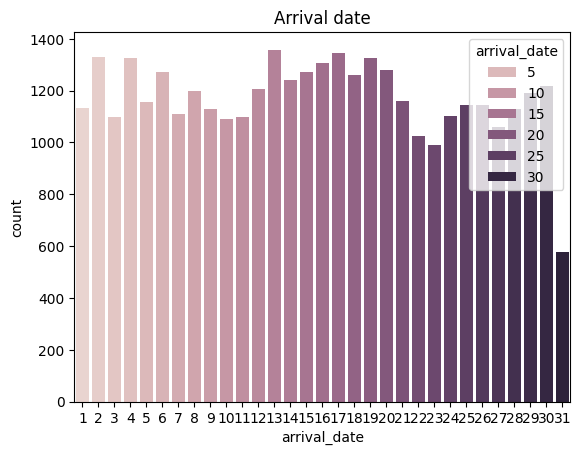

In [12]:
plt.title("Arrival date")
sns.countplot(df,x="arrival_date",hue="arrival_date")
plt.show()

####
#### In above graph,on arrival date 13,there is the highest number of bookings.

####

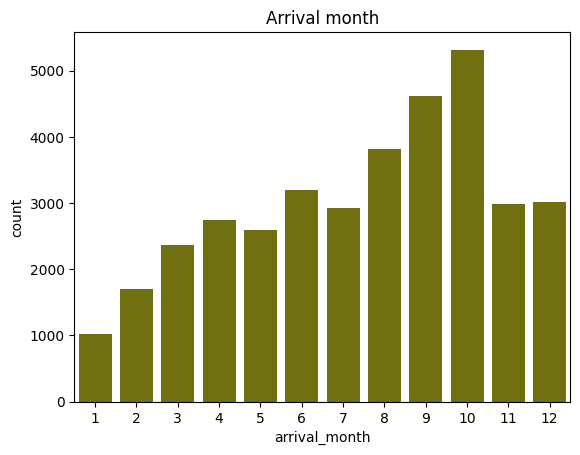

In [13]:
plt.title("Arrival month")
sns.countplot(df,x="arrival_month",color="olive")
plt.show()

####
#### In this graph,the number of bookings is highest in the month of October(i.e-10).

####

Text(0, 0.5, 'Counting values')

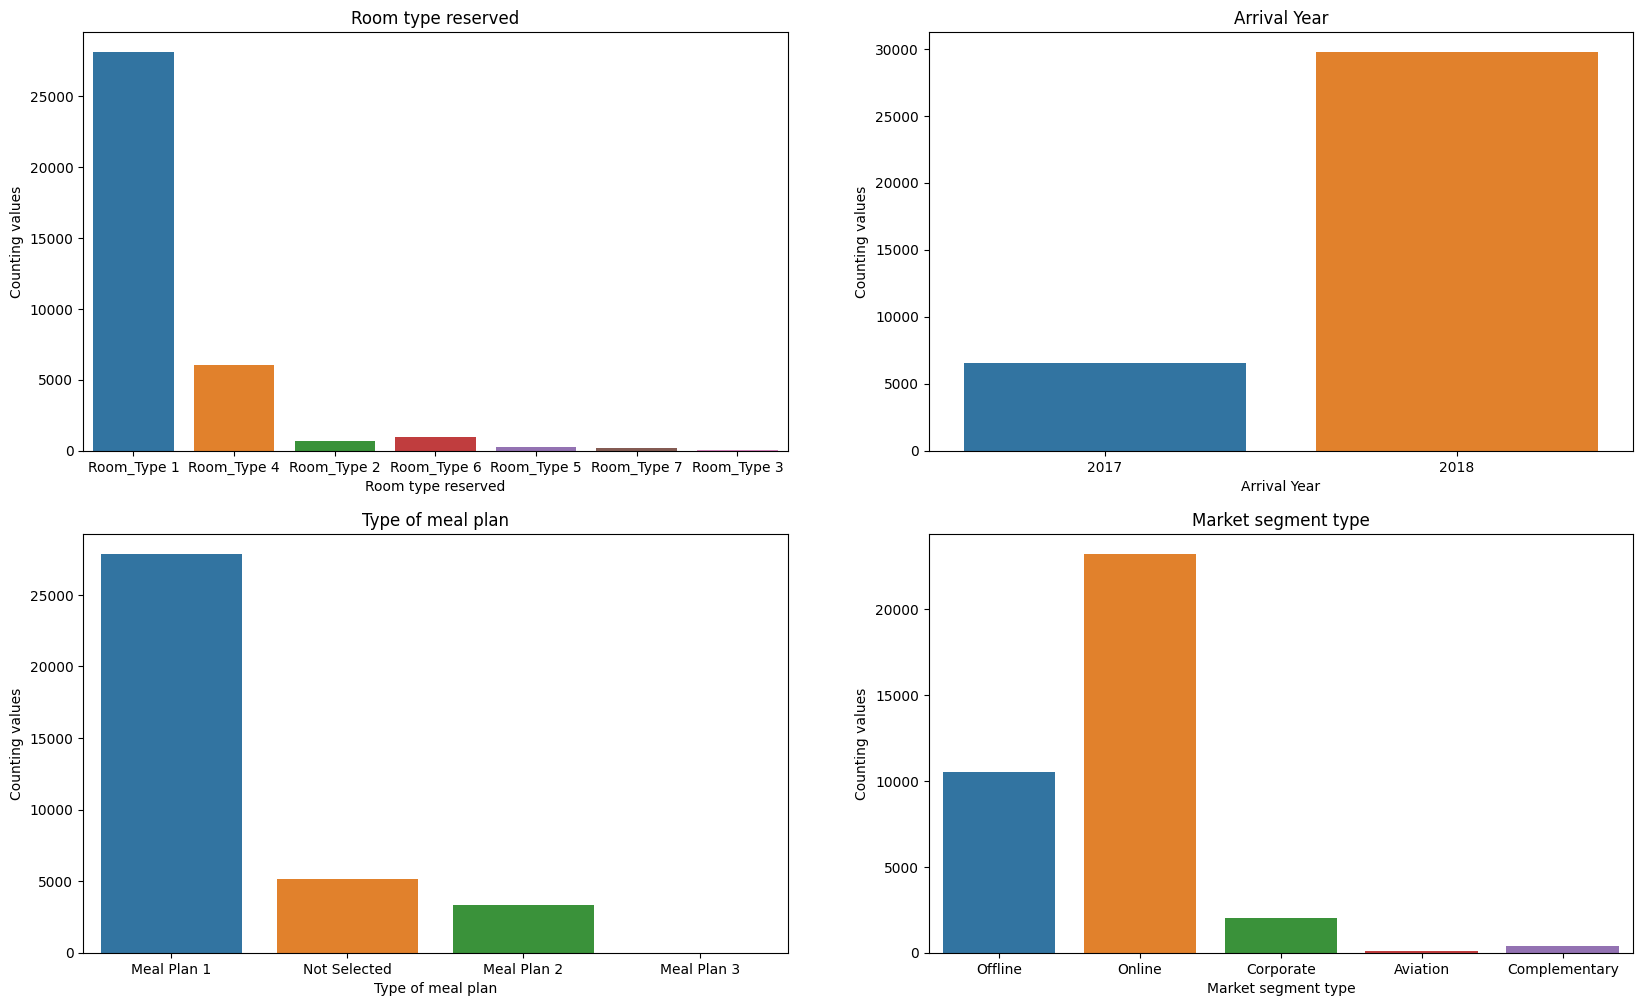

In [14]:
plt.figure(figsize = (20,25))
plt.subplot(4,2,1)
plt.title("Room type reserved")
sns.countplot(x="room_type_reserved", palette="tab10",data=df)
plt.xlabel("Room type reserved")
plt.ylabel("Counting values")

plt.subplot(4,2,2)
plt.title("Arrival Year")
sns.countplot(x="arrival_year",palette="tab10",data=df)
plt.xlabel("Arrival Year")
plt.ylabel("Counting values")

plt.subplot(4,2,3)
plt.title("Type of meal plan")
sns.countplot(x="type_of_meal_plan",palette="tab10",data=df)
plt.xlabel("Type of meal plan")
plt.ylabel("Counting values")

plt.subplot(4,2,4)
plt.title("Market segment type")
sns.countplot(x="market_segment_type",palette="tab10",data=df)
plt.xlabel("Market segment type")
plt.ylabel("Counting values")


####
#### In room type reserved we can see room type 1 is reserved more than others.
#### We have the most values for 2018.
#### In type of meal plan,meal plan 1 is preferred more than others.
#### We observe that online market segment type has highest values than others.

####

Text(0, 0.5, 'Booking status')

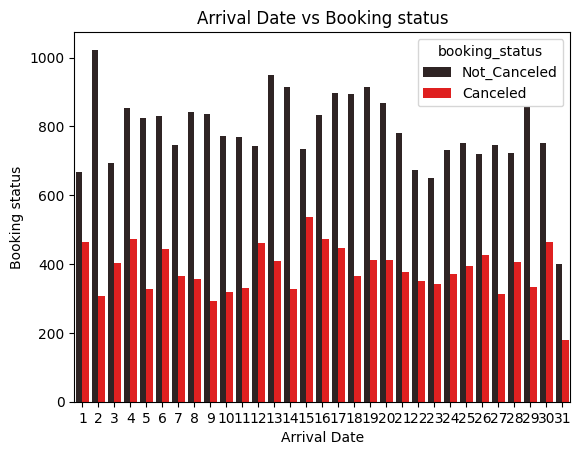

In [15]:
plt.title("Arrival Date vs Booking status")
sns.countplot(x=df["arrival_date"],hue=df["booking_status"],color="r")
plt.xlabel("Arrival Date")
plt.ylabel("Booking status")

####
#### We observe that on the 2nd of the month,there is the highest number of non-cancelled hotel reservations, 

#### whereas on the 15th of the month, there is the highest number of cancelled hotel reservations.

####

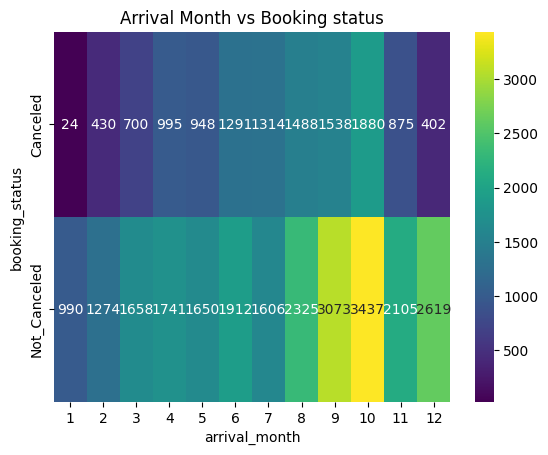

In [16]:
plt.title("Arrival Month vs Booking status")
sns.heatmap(pd.crosstab(columns=df["arrival_month"],
                        index=df["booking_status"]), annot=True, fmt="d", cmap="viridis")
plt.show()

####
#### In the month of October,there are the highest numbers of both non-cancelled(3437) and cancelled(1880) hotel 

#### reservations.

####

In [17]:
df["room_type_reserved"].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [18]:
df["market_segment_type"].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [19]:
df["type_of_meal_plan"].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [20]:
room = {
    "Room_Type 1": 0,
    "Room_Type 2": 1,
    "Room_Type 3": 2,
    "Room_Type 4": 3,
    "Room_Type 5": 4,
    "Room_Type 6": 5,
    "Room_Type 7": 6
}

In [21]:
df["room_type"] = df["room_type_reserved"].map(room)

In [22]:
meal = {
    "Not Selected":0,   
    "Meal Plan 1":1,
    "Meal Plan 2":2,    
    "Meal Plan 3":3
}

In [23]:
df["meal_plan"] = df["type_of_meal_plan"].map(meal)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
df["market_type"] = le.fit_transform(df["market_segment_type"])

####
#### Here,we have transformed object values into integers using mapping and label encoding techniques.

####

In [27]:
df.drop(columns=["type_of_meal_plan"], axis=1, inplace=True)
df.drop(columns=["room_type_reserved"], axis=1, inplace=True)
df.drop(columns=["market_segment_type"], axis=1, inplace=True)

#### We have dropped the 'Type of meal plan', 'Room type reserved', and 'Market segment type' columns, as we have 

#### already created corresponding integer columns for them.

####

In [28]:
df["booking_status"] = le.fit_transform(df["booking_status"])

In [29]:
df[["no_of_adults","booking_status"]].corr(method="pearson")

,no_of_adults,booking_status
no_of_adults,1.00000,-0.08692
booking_status,-0.08692,1.00000


####
#### The correlation coefficient between the 'Number of adults' and 'Booking status',computed using Pearson 

#### correlation,is approximately -0.08692, suggesting a weak negative linear relationship between the two variables.

####

In [30]:
df[["no_of_children","booking_status"]].corr(method="pearson")

,no_of_children,booking_status
no_of_children,1.000000,-0.033078
booking_status,-0.033078,1.000000


####
#### The correlation coefficient between the 'Number of children' and 'Booking status' is approximately -0.033078, 

#### suggesting a weak negative linear relationship between the two variables.

####

In [31]:
df[["no_of_children","avg_price_per_room"]].corr(method="pearson")

,no_of_children,avg_price_per_room
no_of_children,1.000000,0.337728
avg_price_per_room,0.337728,1.000000


####
#### The correlation coefficient between the 'Number of children' and the 'Average price per room' is approximately 

#### 0.337728, indicating a moderate positive linear relationship between these two variables.

####

In [32]:
df[["no_of_adults","avg_price_per_room"]].corr(method="pearson")

,no_of_adults,avg_price_per_room
no_of_adults,1.000000,0.296886
avg_price_per_room,0.296886,1.000000


####
#### The correlation coefficient between the 'Number of adults' and the 'Average price per room' is approximately 

#### 0.296886, suggesting a moderate positive linear relationship between these two variables.

####

In [33]:
df["total_guests"] = df["no_of_adults"] + df["no_of_children"]

####
#### We created a new feature,'total_guests',by summing the number of adults and children, to explore its relationship with booking status.

####

In [34]:
df.drop(columns=["no_of_adults"], axis=1, inplace=True)
df.drop(columns=["no_of_children"], axis=1, inplace=True)

In [35]:
df[["total_guests","avg_price_per_room"]].corr(method="pearson")

,total_guests,avg_price_per_room
total_guests,1.000000,0.445906
avg_price_per_room,0.445906,1.000000


####
#### The correlation coefficient between the 'Total number of guests' and the 'Average price per room' is 

#### approximately 0.445906, indicating a moderate positive linear relationship between these two variables.

####

<Axes: >

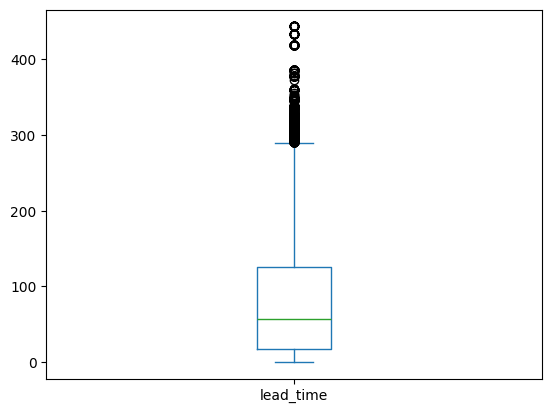

In [36]:
df["lead_time"].plot.box()

####
#### Here, we can observe outliers in the lead time. 

####

In [37]:
df[["lead_time","avg_price_per_room"]].corr(method="pearson")

,lead_time,avg_price_per_room
lead_time,1.000000,-0.062596
avg_price_per_room,-0.062596,1.000000


####
#### The correlation matrix shows that there is a weak negative correlation (-0.062596) between 'Lead time' and 

#### 'Average price per room'.

####

In [38]:
df[["lead_time","booking_status"]].corr(method="pearson")

,lead_time,booking_status
lead_time,1.000000,-0.438538
booking_status,-0.438538,1.000000


####
#### The correlation matrix indicates a moderate negative correlation (-0.438538) between 'Lead time' and 'Booking status'.

####

In [39]:
df[["arrival_year","booking_status"]].corr(method="pearson")

,arrival_year,booking_status
arrival_year,1.000000,-0.179529
booking_status,-0.179529,1.000000


####
#### The correlation matrix displays a weak negative correlation (-0.179529) between 'Arrival year' and 'Booking status'.

####

In [40]:
df[["arrival_year","avg_price_per_room"]].corr(method="pearson")

,arrival_year,avg_price_per_room
arrival_year,1.000000,0.178605
avg_price_per_room,0.178605,1.000000


####
#### The correlation matrix reveals a weak positive correlation (0.178605) between 'Arrival year' and 'Average price per room'.

####

In [41]:
df.drop(columns=["lead_time"], axis=1, inplace=True)
df.drop(columns=["arrival_year"], axis=1, inplace=True)

####
#### We have dropped the 'Lead time' & 'Arrival year' columns,as we cannot see any relation with 'Booking status' 

#### and 'Average price per room.'

####

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_weekend_nights                  36275 non-null  int64  
 1   no_of_week_nights                     36275 non-null  int64  
 2   required_car_parking_space            36275 non-null  int64  
 3   arrival_month                         36275 non-null  int64  
 4   arrival_date                          36275 non-null  int64  
 5   repeated_guest                        36275 non-null  int64  
 6   no_of_previous_cancellations          36275 non-null  int64  
 7   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 8   avg_price_per_room                    36275 non-null  float64
 9   no_of_special_requests                36275 non-null  int64  
 10  booking_status                        36275 non-null  int32  
 11  room_type      

####
#### After analyzing,we have a dataset consisting of 36275 instances and 15  variables.

####

## MODELS

####

In [43]:
X = df.drop(["booking_status"],axis=1)
Y = df["booking_status"]

In [44]:
X.shape

(36275, 14)

In [45]:
Y.shape

(36275,)

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75,random_state=42)

In [47]:
X_train.shape

(27206, 14)

In [48]:
X_test.shape

(9069, 14)

####
##  Support Vector Machine:
#### Using Support Vector Machine can handle outliers by paying attention to the general patterns in the data and 

#### not letting individual unusual points have too much influence.

####

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
X_train = scaler.fit_transform(X_train)

In [52]:
X_test = scaler.transform(X_test)

####
#### Here we are using 'linear' as kernel.

####

In [53]:
svc = SVC(kernel="linear")

In [54]:
svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [55]:
svc.score(X_train, Y_train)

0.7334779092847166

####
#### The model score of SVM is 0.7334779092847166.

####

In [56]:
y_pred = svc.predict(X_test)

In [57]:
a1 = accuracy_score(Y_test, y_pred)

In [58]:
f1_svc = f1_score(Y_test,y_pred)

In [59]:
pr_svc = precision_score(Y_test,y_pred)

In [60]:
rec_svc = recall_score(Y_test,y_pred)

In [61]:
r1_data = [['Support Vector Machine', a1, f1_svc, pr_svc, rec_svc]]
r1_columns = ['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall']

r1 = pd.DataFrame(r1_data, columns=r1_columns)
r1

,Model,Accuracy Score,F1 score,Precision,Recall
0,Support Vector Machine,0.724997,0.805733,0.761148,0.855866


####
#### In SVM result,we can observe the accuracy score is 0.724997,
#### the F1 score is 0.805733,
#### the precision is 0.761148,
#### the recall is 0.855866.

####

In [62]:
confusion_matrix(Y_test, y_pred)

array([[1403, 1623],
       [ 871, 5172]], dtype=int64)

####
### The confusion matrix for the Support Vector Machine shows:
#### 1403 were correctly predicted as positive (true positives).
#### 1623 were incorrectly predicted as negative (false negatives).
#### 871 were incorrectly predicted as positive when they were actually negative (false positives).
#### 5172 were correctly predicted as negative (true negatives).

####

In [63]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.46      0.53      3026
           1       0.76      0.86      0.81      6043

    accuracy                           0.72      9069
   macro avg       0.69      0.66      0.67      9069
weighted avg       0.71      0.72      0.71      9069



####
## Logistic Regression:
#### Now using Logistic Regression,on this dataset to predict the probability of a binary outcome, such as whether 

#### a booking will be canceled or not, based on various input features.

####

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr = LogisticRegression()

In [66]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [67]:
lr.score(X_train,Y_train)

0.7352789825773727

####
#### The model score of Logistic Regression is 0.7352789825773727.

####

In [68]:
y_pred2 = lr.predict(X_test)

In [69]:
a2 = accuracy_score(Y_test, y_pred2)

In [70]:
f1_lr = f1_score(Y_test,y_pred2)

In [71]:
pr_lr = precision_score(Y_test,y_pred2)

In [72]:
rec_lr = recall_score(Y_test,y_pred2)

In [73]:
r2_data = [['LogisticRegression', a2, f1_lr, pr_lr, rec_lr]]
r2_columns = ['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall']

r2 = pd.DataFrame(r2_data, columns=r2_columns)
r2

,Model,Accuracy Score,F1 score,Precision,Recall
0,LogisticRegression,0.725769,0.812825,0.745445,0.893596


####
#### In Logistic Regression result,we can observe the accuracy score is 0.725769,
#### the F1 score is 0.812825,
#### the precision is 0.745445,
#### the recall is 0.893596.

####

In [74]:
confusion_matrix(Y_test, y_pred2)

array([[1182, 1844],
       [ 643, 5400]], dtype=int64)

####
### The confusion matrix for the  Logistic Regression shows:
#### 1182 were correctly predicted as positive (true positives).
#### 1844 were incorrectly predicted as negative (false negatives).
#### 643 were incorrectly predicted as positive when they were actually negative (false positives).
#### 5400 were correctly predicted as negative (true negatives).

####

In [75]:
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.65      0.39      0.49      3026
           1       0.75      0.89      0.81      6043

    accuracy                           0.73      9069
   macro avg       0.70      0.64      0.65      9069
weighted avg       0.71      0.73      0.70      9069



####
## K-Nearest Neighbors Classifier:
#### The K-Nearest Neighbors Classifier is  and likely being used to predict the booking status (e.g., canceled or 

#### not canceled) based on various features and predicts classification based on the nearest neighbors.

###


In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier(n_neighbors=50)

In [78]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=50)

In [79]:
knn.score(X_train,Y_train)

0.7946041314415938

####
#### The model score of K-Nearest Neighbors Classifier is 0.7946041314415938.

####

In [80]:
y_pred3 = knn.predict(X_test)

In [81]:
a3 = accuracy_score(Y_test, y_pred3)

In [82]:
f1_knn = f1_score(Y_test,y_pred3)

In [83]:
pr_knn = precision_score(Y_test,y_pred3)

In [84]:
rec_knn = recall_score(Y_test,y_pred3)

In [85]:
r3_data = [['KNeighborsClassifier', a3, f1_knn, pr_knn, rec_knn]]
r3_columns = ['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall']

r3 = pd.DataFrame(r3_data, columns=r3_columns)
r3

,Model,Accuracy Score,F1 score,Precision,Recall
0,KNeighborsClassifier,0.786415,0.842405,0.828585,0.856694


####
#### In  K-Nearest Neighbors Classifier result,we can observe the accuracy score is 0.786415,
#### the F1 score is 0.842405,
#### the precision is 0.828585,
#### the recall is 0.856694.

####

In [86]:
confusion_matrix(Y_test, y_pred3)

array([[1955, 1071],
       [ 866, 5177]], dtype=int64)

####
### The confusion matrix for the K-Nearest Neighbors Classifier shows:
#### 1955  were correctly predicted as positive (true positives).
#### 1071  were incorrectly predicted as negative (false negatives).
####  866  were incorrectly predicted as positive when they were actually negative (false positives).
#### 5177  were correctly predicted as negative (true negatives).

####


In [87]:
print(classification_report(Y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      3026
           1       0.83      0.86      0.84      6043

    accuracy                           0.79      9069
   macro avg       0.76      0.75      0.76      9069
weighted avg       0.78      0.79      0.78      9069



####
## Adaptive Boosting Classifier:
#### The Adaptive Boosting Classifier focuses on improving classification accuracy by iteratively adjusting its 

#### model based on misclassified instances.

####

In [88]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [89]:
base_estimator = DecisionTreeClassifier()

In [90]:
model = AdaBoostClassifier(estimator=base_estimator,n_estimators=20)

In [91]:
model.fit(X_train,Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=20)

In [92]:
model.score(X_train,Y_train)

0.9842314195398074

####
#### The model score of Adaptive Boosting Classifier is 0.9842314195398074.

####

In [93]:
y_pred4 = model.predict(X_test)

In [94]:
a4 = accuracy_score(Y_test,y_pred4)

In [95]:
f1_ada = f1_score(Y_test,y_pred4)

In [96]:
pr_ada = precision_score(Y_test,y_pred4)

In [97]:
rec_ada = recall_score(Y_test,y_pred4)

In [98]:
r4_data = [['AdaBoostClassifier', a4, f1_ada, pr_ada, rec_ada]]
r4_columns = ['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall']

r4 = pd.DataFrame(r4_data, columns=r4_columns)
r4

,Model,Accuracy Score,F1 score,Precision,Recall
0,AdaBoostClassifier,0.823906,0.869045,0.861346,0.876882


####
#### In Adaptive Boosting Classifier result,we can observe the accuracy score is 0.823906,
#### the F1 score is 0.869045,
#### the precision is 0.861346,
#### the recall is 0.876882.

####

In [99]:
confusion_matrix(Y_test, y_pred4)

array([[2173,  853],
       [ 744, 5299]], dtype=int64)

#####
### The confusion matrix for the Adaptive Boosting Classifier shows:
#### 2173  were correctly predicted as positive (true positives).
#### 853  were incorrectly predicted as negative (false negatives).
#### 744  were incorrectly predicted as positive when they were actually negative (false positives).
#### 5299  were correctly predicted as negative (true negatives).

####

In [100]:
print(classification_report(Y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      3026
           1       0.86      0.88      0.87      6043

    accuracy                           0.82      9069
   macro avg       0.80      0.80      0.80      9069
weighted avg       0.82      0.82      0.82      9069



####
## Random Forest Classifier:
#### The Random Forest Classifier constructs multiple decision trees independently and combines their predictions 

#### through averaging.

 ###

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
model2 = RandomForestClassifier(n_estimators=50,n_jobs=-1,criterion="entropy")

In [103]:
model2.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, n_jobs=-1)

In [104]:
model2.score(X_train,Y_train)

0.9841211497463794

####
#### The model score of Random Forest Classifier is 0.9841211497463794.

###

In [105]:
y_pred5 = model2.predict(X_test)

In [106]:
a5 = accuracy_score(Y_test,y_pred5)

In [107]:
f1_rfc = f1_score(Y_test,y_pred5)

In [108]:
pr_rfc = precision_score(Y_test,y_pred5)

In [109]:
rec_rfc = recall_score(Y_test,y_pred5)

In [110]:
r5_data = [['RandomForestClassifier', a5, f1_rfc, pr_rfc, rec_rfc]]
r5_columns = ['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall']

r5 = pd.DataFrame(r5_data, columns=r5_columns)
r5

,Model,Accuracy Score,F1 score,Precision,Recall
0,RandomForestClassifier,0.857426,0.895227,0.877104,0.914116


####
#### In Random Forest Classifier result,we can observe the accuracy score is 0.857426,
#### the F1 score is 0.895227,
#### the precision is 0.877104,
#### the recall is 0.914116.

####

In [111]:
confusion_matrix = confusion_matrix(Y_test, y_pred5)
confusion_matrix

array([[2252,  774],
       [ 519, 5524]], dtype=int64)

####
### The confusion matrix for the RandomForestClassifier shows:
#### 2252 were correctly predicted as positive (true positives).
#### 774 were incorrectly predicted as negative (false negatives).
#### 519 were incorrectly predicted as positive when they were actually negative (false positives).
#### 5524 were correctly predicted as negative (true negatives).

####

In [112]:
print(classification_report(Y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78      3026
           1       0.88      0.91      0.90      6043

    accuracy                           0.86      9069
   macro avg       0.84      0.83      0.84      9069
weighted avg       0.86      0.86      0.86      9069



In [113]:
results = pd.concat([r5,r4,r3,r2,r1])
results_sorted = results.sort_values(by='Accuracy Score', ascending=False)
results_sorted

,Model,Accuracy Score,F1 score,Precision,Recall
0,RandomForestClassifier,0.857426,0.895227,0.877104,0.914116
0,AdaBoostClassifier,0.823906,0.869045,0.861346,0.876882
0,KNeighborsClassifier,0.786415,0.842405,0.828585,0.856694
0,LogisticRegression,0.725769,0.812825,0.745445,0.893596
0,Support Vector Machine,0.724997,0.805733,0.761148,0.855866


####
# RESULT:
#### In the given data, the Random Forest Classifier achieved the highest accuracy score (0.857) and F1 score 

#### (0.895), indicating strong overall performance in predicting booking status.  Adaptive Boosting Classifier 

#### followed with slightly lower accuracy and F1 scores (0.823 and 0.869, respectively), while K-Nearest Neighbors 

#### Classifier and Logistic Regression showed comparatively lower performance.

####